In [1]:
import numpy as np

def ecg_gen_stochastic_with_series(N, fs, f, f_deviations, alpha, delta_alpha, b, delta_b, theta, delta_theta, theta0):
    """
    Generate synthetic ECG with beat-wise stochastic deviations and record parameter variations.

    Returns:
        ecg (np.ndarray): Synthetic ECG signal.
        phi (np.ndarray): ECG phase.
        f_series, alpha_series, b_series, theta_series: Parameter variations over time.
    """
    w = 2 * np.pi * f
    dt = 1 / fs

    phi = np.zeros(N)
    ecg = np.zeros(N)

    phi[0] = theta0
    d_alpha = np.copy(alpha)
    d_theta = np.copy(theta)
    d_b = np.copy(b)

    # ✅ Store deviation series
    f_series = np.zeros(N)
    alpha_series = np.zeros((N, len(alpha)))
    b_series = np.zeros((N, len(b)))
    theta_series = np.zeros((N, len(theta)))

    for i in range(N - 1):
        dtetai = (phi[i] - d_theta + np.pi) % (2 * np.pi) - np.pi

        if i == 0:
            ecg[i] = np.sum(d_alpha * np.exp(-dtetai**2 / (2 * d_b**2)))

        ecg[i + 1] = ecg[i] - dt * np.sum(w * d_alpha / (d_b**2) * dtetai * np.exp(-dtetai**2 / (2 * d_b**2)))

        phi[i + 1] = phi[i] + w * dt

        # ✅ Store current deviations
        f_series[i] = w / (2 * np.pi)
        alpha_series[i] = d_alpha
        b_series[i] = d_b
        theta_series[i] = d_theta

        # ✅ Beat transition with stochastic deviations
        if phi[i + 1] > np.pi:
            phi[i + 1] -= 2 * np.pi
            d_alpha = alpha * (1 + (np.random.rand(len(alpha)) - 0.5) * delta_alpha)
            d_theta = theta * (1 + (np.random.rand(len(theta)) - 0.5) * delta_theta)
            d_b = b * np.maximum(0, (1 + (np.random.rand(len(b)) - 0.5) * delta_b))
            w = 2 * np.pi * f * np.maximum(0, (1 + (np.random.rand() - 0.5) * f_deviations))

    # Return the ECG, phase, and series of deviations
    return ecg, phi, f_series, alpha_series, b_series, theta_series


In [2]:
import matplotlib.pyplot as plt

def plot_stochastic_ecg_visualizations(ecg, phi, N, fs, alpha, b, theta, f_series, alpha_series, b_series, theta_series):
    """
    Plot visualizations for the stochastic ECG generation.

    Args:
        ecg (np.ndarray): Synthetic ECG signal.
        phi (np.ndarray): ECG phase.
        N (int): Number of samples.
        fs (float): Sampling frequency.
        alpha, b, theta (np.ndarray): Initial GMM parameters.
        f_series (np.ndarray): Frequency deviations over time.
        alpha_series (np.ndarray): Amplitude deviations over time.
        b_series (np.ndarray): Width deviations over time.
        theta_series (np.ndarray): Phase deviations over time.
    """
    time = np.arange(N) / fs

    # ✅ Plot 1: ECG waveform with beat transitions highlighted
    plt.figure(figsize=(15, 6))
    plt.plot(time, ecg, label='ECG waveform', color='blue')

    # Highlight beat transitions
    beat_indices = np.where(np.diff(phi) < 0)[0]
    plt.scatter(time[beat_indices], ecg[beat_indices], color='red', label='Beat Transitions', zorder=5)

    plt.title('Time-Domain Stochastic ECG with Beat Transitions')
    plt.xlabel('Time (s)')
    plt.ylabel('ECG Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()

    # ✅ Plot 2: Amplitude, Width, and Phase deviations over time
    fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

    axs[0].plot(time, alpha_series, label='Amplitude Deviations', color='green')
    axs[0].set_ylabel('Amplitude')
    axs[0].set_title('Amplitude Deviations Over Time')
    axs[0].grid(True)

    axs[1].plot(time, b_series, label='Width Deviations', color='orange')
    axs[1].set_ylabel('Width')
    axs[1].set_title('Width Deviations Over Time')
    axs[1].grid(True)

    axs[2].plot(time, theta_series, label='Phase Deviations', color='purple')
    axs[2].set_ylabel('Phase (radians)')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_title('Phase Deviations Over Time')
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

    # ✅ Plot 3: Frequency variations over time
    plt.figure(figsize=(15, 5))
    plt.plot(time, f_series, label='Frequency Deviations', color='magenta')
    plt.title('Frequency Variations Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()

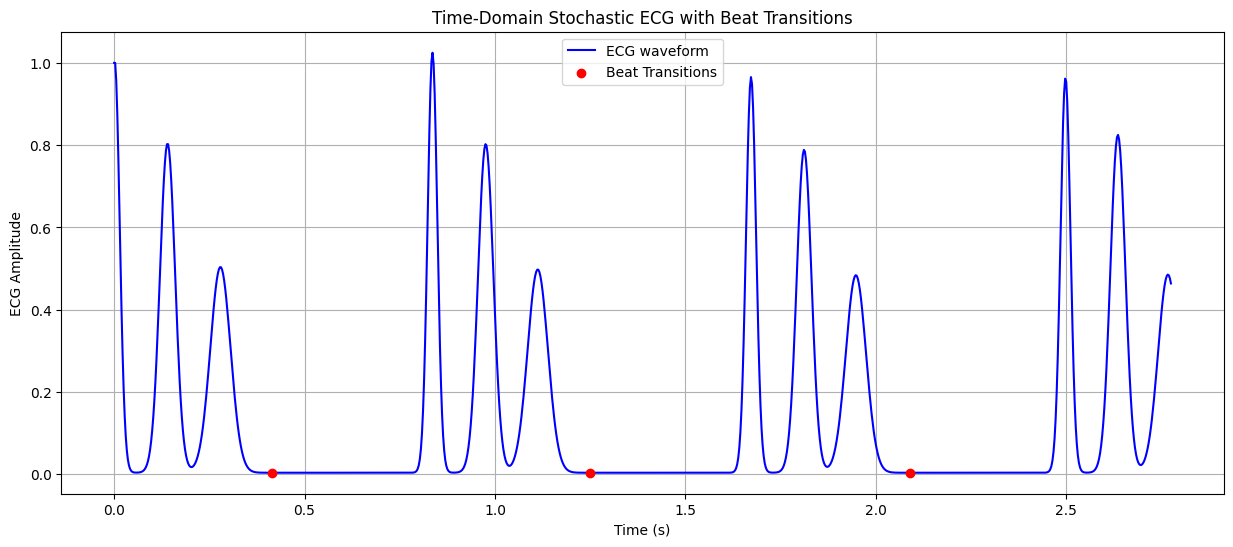

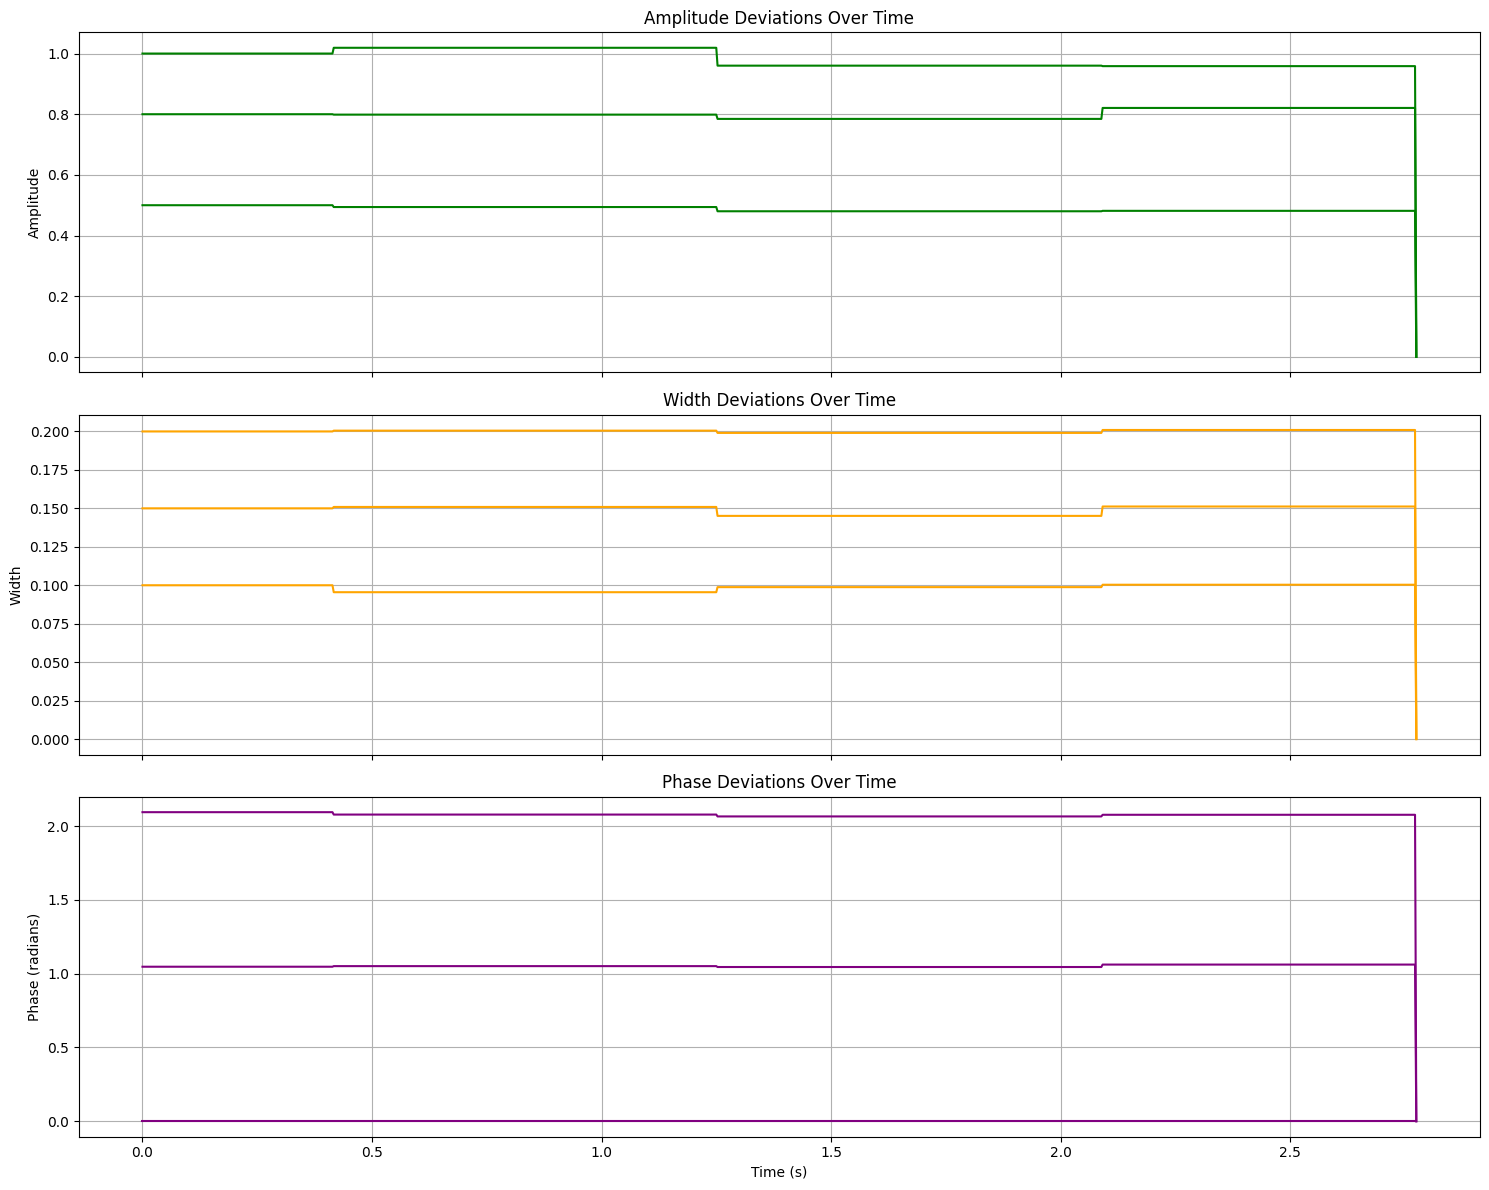

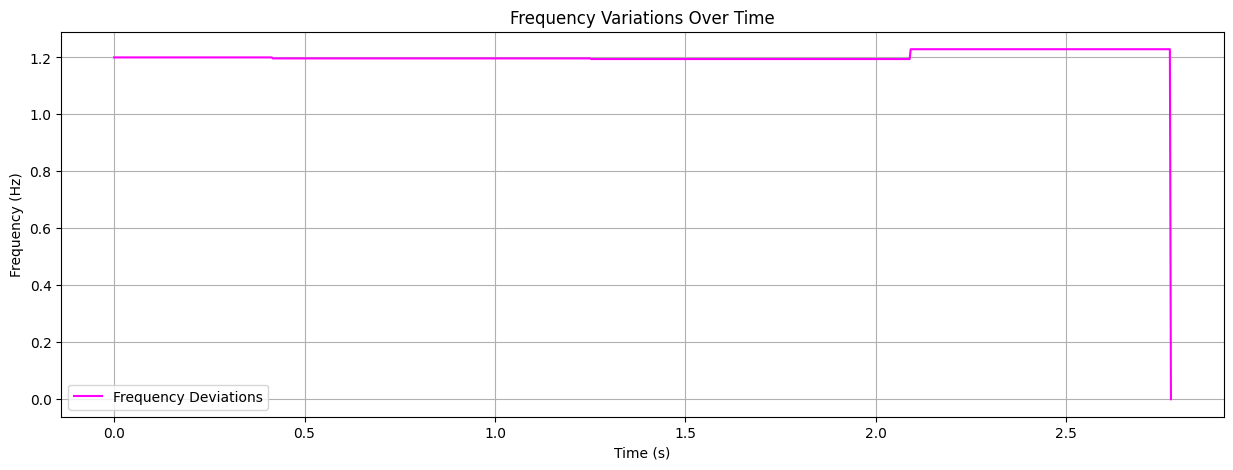

In [3]:
# ✅ Generate the stochastic ECG with parameter series
N = 1000
fs = 360
f = 1.2
f_deviations = 0.05
alpha = np.array([1.0, 0.8, 0.5])
delta_alpha = 0.1
b = np.array([0.1, 0.15, 0.2])
delta_b = 0.1
theta = np.array([0, np.pi / 3, 2 * np.pi / 3])
delta_theta = 0.05
theta0 = 0.0

# ✅ Run the generator
ecg, phi, f_series, alpha_series, b_series, theta_series = ecg_gen_stochastic_with_series(
    N, fs, f, f_deviations, alpha, delta_alpha, b, delta_b, theta, delta_theta, theta0
)

# ✅ Plot visualizations
plot_stochastic_ecg_visualizations(ecg, phi, N, fs, alpha, b, theta, f_series, alpha_series, b_series, theta_series)